# Introduction  
Data analysis is emerging to become one of the most critical component in modern world's progression across all industries. Without data analysis, people will spend more time manually searching among terabytes of movies, music, restaurants, and places to visit. Machines have learned our tastes and the world's trends to help us same time and keep us entertained through a mechanism called machine learning.  
However, without implementing better, faster, and more accurate machine learning techniques, things will start to slow down again as data keeps growing bigger. That is the motive of this study.   
This study aims to compare two classification methods Logistic Regression and Decision Tree Classifiers. Both can be used to classify binary outcomes, and the dataset is a good fit to demonstrate each method's capabilities. At the end of the study, the performance metrics for each method will be compared and discussed.

### Part 1. Data Cleaning and EDA
The dataset is taken from kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv), originally obtained from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains some sensitive and personal information that may imply certain eating habits and daily behaviors and should be kept in the viewer's discretion.  

In [52]:
#import necessary packages
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
#Inspect number of observations, features, null values, variable types, and basic statistics.
data = pd.read_csv("diabetes.csv")

In [54]:
#View general information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [57]:
#Check null values
data.isnull().sum()
count_zero = dict()
names = []
for name in data.columns:
    count_zero[name] = (data[name] == 0).sum()
    names.append(name)
print(count_zero)

{'Pregnancies': 111, 'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'Outcome': 500}


The information table tells us that the dataset has 9 features with data types of a combination of numbers(float64) and objects. Some important things to note are that the dataset contains no null values. However, we can see that the minimum values for some of the factors do not make sense. Glucose,  BloodPressure, SkinThickness, Insulin, and BMI should not have 0 as data entries. Since there are no missing values (NA) in the data, it can be assumed that the 0s were entered instead. We can replace these values with the median since it is robust against outliers.

In [29]:
replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for name in replace:
    med = data[name].median()
    data[name] = data[name].replace(0, med)
    
count_zero = dict()    
for name in data.columns:
    count_zero[name] = (data[name] == 0).sum()
print(count_zero)

{'Pregnancies': 111, 'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'Outcome': 500}


The dataset is clean and ready for complete case analysis. 
Histograms help visualize the distribution, outliers in the data, central tendency, skewness, and other important statistics. Below are the histograms for each features. Below is a histogram with the density function overlaid for each feature in the dataset.

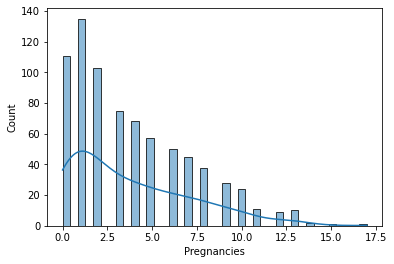

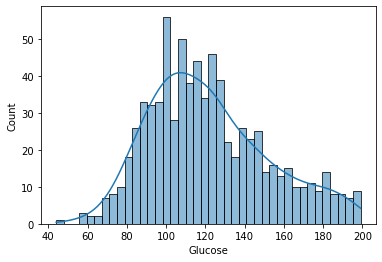

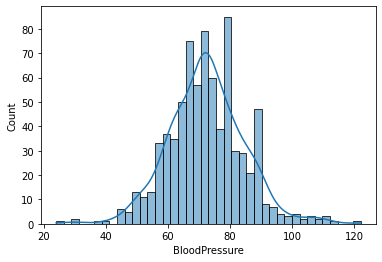

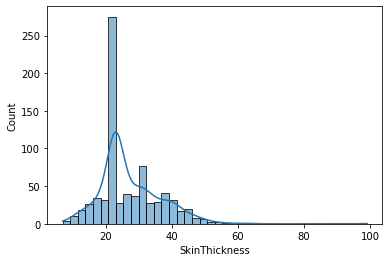

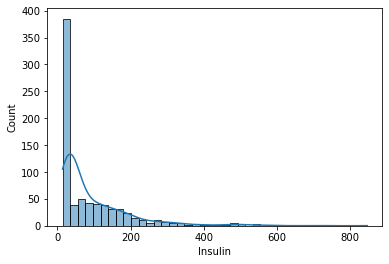

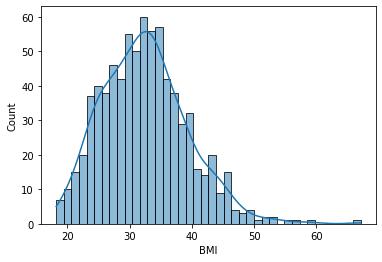

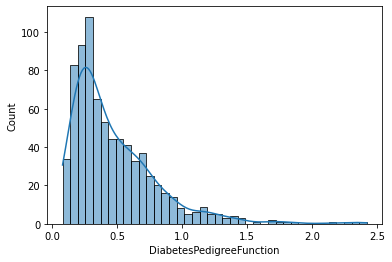

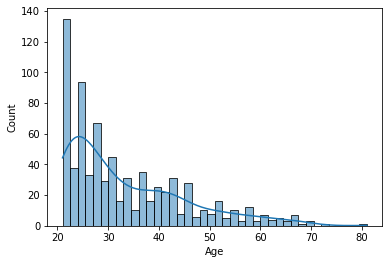

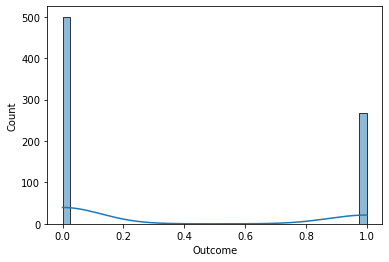

In [30]:
for name in names:
    sns.histplot(data[name], kde = True, bins = 40)
    plt.show()

The features pregnancy, skin thickness, insulin, diabetes pedigree function, and age all show a positive skew in their distribution. On the other hand, features glucose, blood pressure, and BMI resemble a normal distribution, with their means centered at around 110, 70, and 30, respectively. The outcome feature is binary and thus show a bimodal shape.

Now we will plot correlation matrix using seaborn's heatmap. Also, we will create a pairplot to make a quick inspection of relationships between features. The diagonals will be used to make a KDE plot.

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231

<AxesSubplot:>

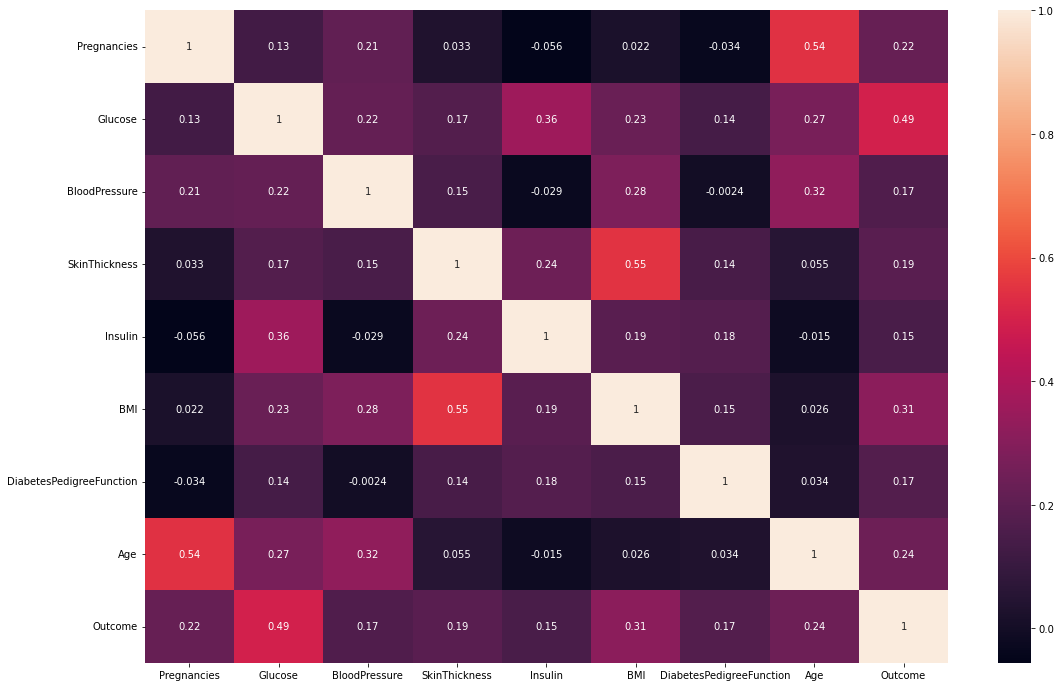

In [31]:
#create correlation matrix
#Plot heatmap using matrix
corrMatrix = data.corr()
print(corrMatrix)
plt.figure(figsize = (18,12))
sns.heatmap(corrMatrix, annot = True)

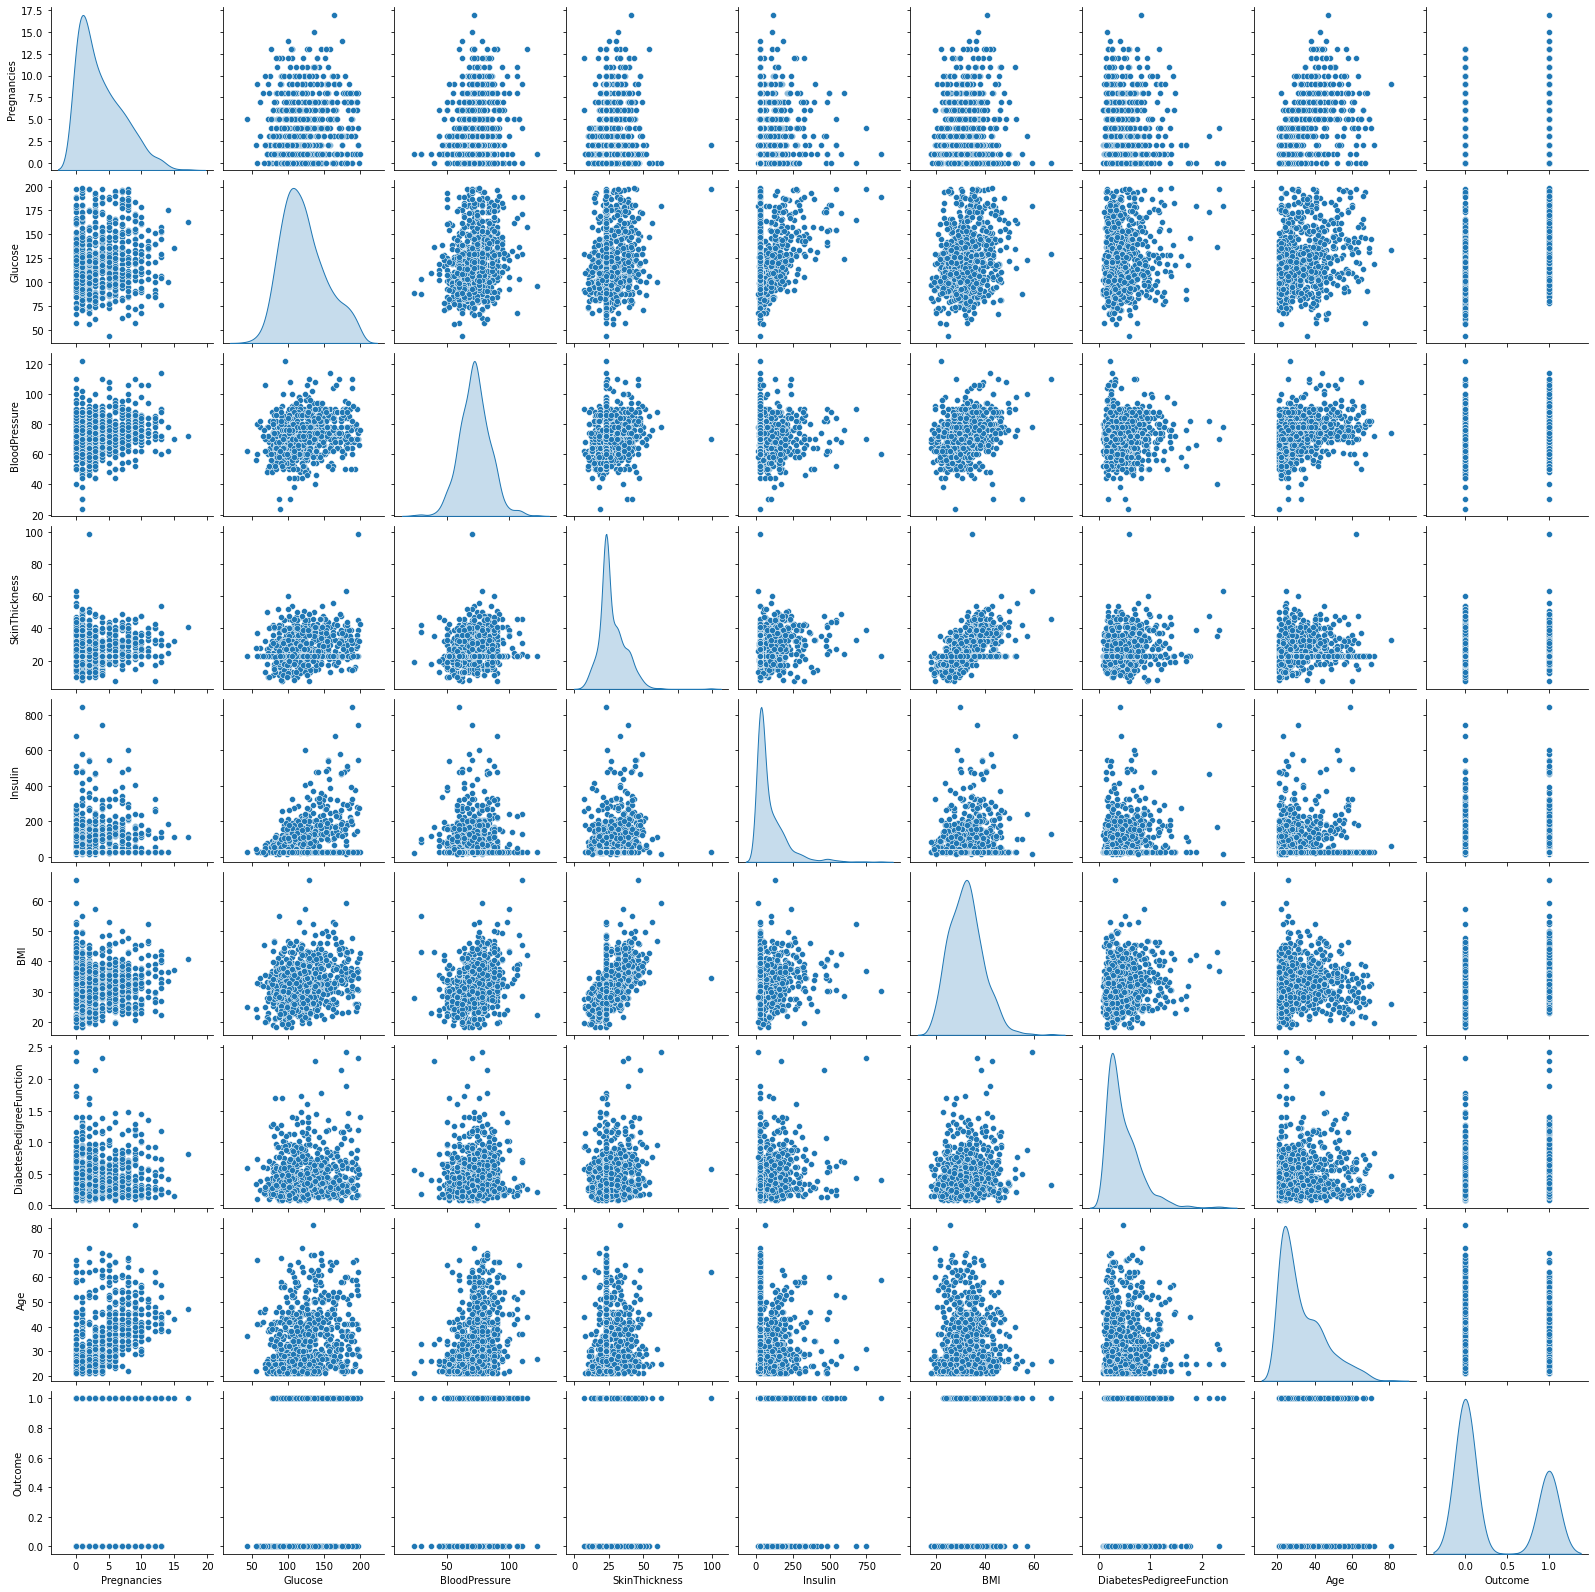

In [32]:
# Pairplot of data
sns.pairplot(data, vars = names, diag_kind = 'kde')

Based on correlation heatmap, there is a relatively strong correlation between BMI & SkinThickness, Age & Pregnancy, Outcome & Glucose, which intuitively make sense. Thicker skin is more likely to lead to higher BMI index, and outcome of a diabetes diagnosis is strongly connected to glucose levels in the body.

### Part 2. Data Analysis using Decision Tree Classifier vs Logistic regression.
The target feature that this study aims to predict is the 'outcome' of a diabetes diagnostic test, which takes values 0 (negative) and 1 (positive). 

The data is ready for machine learning and generating regression models. It needs to be split to training and test data with test proportion of 0.2.

In [36]:
#Assign target variable y to 'outcome',
#Then split X and y to training and test sets.
y = data['Outcome']
X = data.drop('Outcome', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print(X_train.shape, y_train.shape)

(614, 8) (614,)


#### Performance metrics of Decision Tree Classifier  
A decision tree constructor function will be used to create the classifier. It will take parameters for the features X, outcome y, criterion (entropy, in this case), max depth of decision tree, and the max number of leaf nodes. A confusion matrix and its corresponding performance report is created.

In [47]:
def build_dt(data_X, data_y, criterion = None, max_depth = None, max_leaf_nodes =None):
    '''
    Function to construct DecisionTree.
    Takes parameters for x and y as np.ndarray;
    criterion, max_depth, max_leaf_nodes default values are None but can be specified.
    '''
    
    clf = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
    clf.fit(data_X, data_y)
    
    return clf


In [51]:
dtr = build_dt(X_train, y_train, criterion = 'entropy', max_depth = 2)
y_pred = dtr.predict(X_test)
dt_pm_train = dtr.score(X_train, y_train) * 100
dt_pm_test = dtr.score(X_train, y_train) * 100
conf_m = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80        97
           1       0.74      0.30      0.42        57

    accuracy                           0.70       154
   macro avg       0.72      0.62      0.61       154
weighted avg       0.71      0.70      0.66       154



***Metrics Summary***

#### Performance metrics for Logistic Regression  
Here, sklearn's LogisticRegression function is used to create the model. Max iterations is set different from the default value as to avoid iteration limit. The training data is then fit to the model to generate confusion matrix and its corresponding performance report.

In [35]:
LogReg = LogisticRegression(max_iter = 400)
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=400)

Compute performance metrics f1 score, accuracy, precision, and recall for logistic regression.

In [44]:
y_hat = LogReg.predict(X_test)
log_pm_train = LogReg.score(X_train, y_train) * 100
log_pm_test = LogReg.score(X_test, y_test) * 100
conf_m = confusion_matrix(y_test, y_hat)
conf_m
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        97
           1       0.79      0.54      0.65        57

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



## Part 3. Reflection  
  
### Results
The decision tree and logistic regression models were used to predict the classification of a potential diabetes patient. Based on the results produced above, the logistic regression model performed better in making correct predictions, with precision, recall, and accuracy scores all above those from the decision tree model. 
  
### Conclusion
Initial projections regarding the competition of accuracy between the two methods appeared to be close enough to not show any distinguishable difference. After all, both can be used to classify binary outcomes. It shows that thorough research and pursuit of more accurate and detailed insight has warranted guarantee among the countless variables that veil knowledge.
  
### Discussion  
The data cleaning process is the first critical process and arguably the most time consuming part of the entire project. This includes going through different datasets to choose from and considering whether independent features themselves require modelling techniques beforehand in order for the study to be successful. For example, an underlying relationship between blood pressure and skin thickness may bring additional effects to the body anatomically, significantly impacting all other features in the dataset. For someone not very knowledgable in biology and anatomy, it is highly possible for the results of a study to be misleading in an adverse way. Ways to improve datasets would be to have the datasets be more exposed to domain experts, perhaps through a designated website, app, forum, or platform. The sources that provide datasets could have separate sections to keep data accessible only to experienced or knowledgeable individuals to prevent conclusions that may bring risk.